# ДЗ: Теория вероятностей и статистика

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sympy import Rational
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Задача 1.
Предположим, мы хотим найти вероятность того, что на игральной кости при броске выпадет значение больше 4.

In [2]:
p = sum(Rational(i>4, 6) for i in range(6+1))
p

1/3

Задача 2. Написать функцию для вычисления факториала и рассчитать число сочетаний из 6 по 2.

In [3]:
def fact(x):
    """факториал"""
    if (x < 0):
        raise ValueError("fact() not defined for negative values")
    y = 1
    for i in range(2, x+1):
        y *= i
    return y

In [4]:
fact(4)

24

In [5]:
def combinations(n, k):
    """число сочетаний из n по k"""
    return fact(n) // (fact(k) * fact(n - k))

In [6]:
combinations(6, 2)

15

Задача 3. Из 30 стрелков 12 попадает в цель с вероятностью 0,6, 8 стрелков — с вероятностью 0,5, а 10 — с вероятностью 0,7. Наудачу выбранный стрелок произвёл выстрел, поразив цель.
К какой из групп, вероятнее всего, принадлежал этот стрелок?

In [7]:
p_1 = Rational(12, 30)
p_2 = Rational(8, 30)
p_3 = Rational(10, 30)
p_A_1 = 0.6
p_A_2 = 0.5
p_A_3 = 0.7
p_A = p_A_1*p_1 + p_A_2*p_2 + p_A_3*p_3  # вероятность того, что стрелок попадёт в цель
p_1_A = p_1*p_A_1 / p_A  # вероятность того, что стрелок принадлежал к первой группе
p_2_A = p_2*p_A_2 / p_A  # вероятность того, что стрелок принадлежал ко второй группе
p_3_A = p_3*p_A_3 / p_A  # вероятность того, что стрелок принадлежал к третьей группе
plist = [p_1_A, p_2_A, p_3_A]
answer = plist.index(max(plist))+1
print(plist)
print(f"Стрелок, вероятнее всего, принадлежал к {answer} группе")

[0.395604395604396, 0.219780219780220, 0.384615384615385]
Стрелок, вероятнее всего, принадлежал к 1 группе


Задача 4. Сгенерировать выборку реализаций случайной величины (кроме распределения Коши).
Любимое распределение можно выбрать на этом [сайте](https://docs.scipy.org/doc/scipy/reference/stats.html).
Проверить ЦПТ для различных n.

In [8]:
from scipy.stats import expon

In [9]:
n = 1000
a = [[]]
for k in range(1, 5):
    a.append([])
    for _ in range(10**k):
        a[k].append(expon.rvs(size=n).mean())

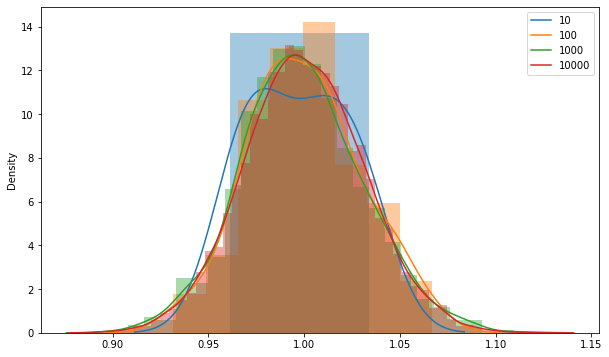

In [10]:
fig = plt.figure(figsize=(10,6))
sns.distplot(a[1])
sns.distplot(a[2])
sns.distplot(a[3])
sns.distplot(a[4])
plt.legend(labels=[f'{10**1}',f'{10**2}',f'{10**3}',f'{10**4}']);

In [11]:
stats.anderson(a[4])

AndersonResult(statistic=0.7162963126465911, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Задача 5. Попробовать применить ЦПТ к распределению Коши.

In [12]:
from scipy.stats import cauchy

In [13]:
n = 1000
a = [[]]
for k in range(1, 5):
    a.append([])
    for _ in range(10**k):
        a[k].append(cauchy.rvs(size=n).mean())

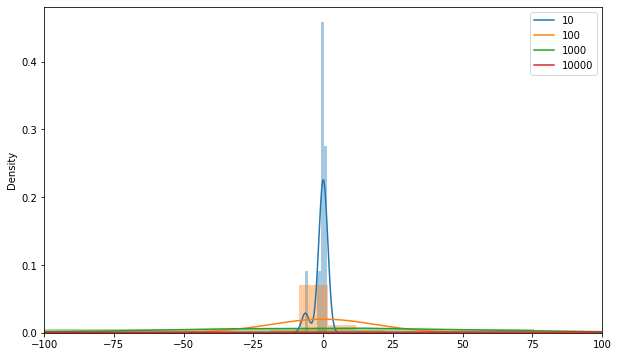

In [14]:
fig = plt.figure(figsize=(10,6))
sns.distplot(a[1])
sns.distplot(a[2])
sns.distplot(a[3])
sns.distplot(a[4])
plt.xlim(-100, 100)
plt.legend(labels=[f'{10**1}',f'{10**2}',f'{10**3}',f'{10**4}']);

In [15]:
stats.anderson(a[4])

AndersonResult(statistic=3791.1948428945307, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Задача 6. Посчитать основные характеристики выборки.

In [16]:
a5=[]
a6=[]
for _ in range(100000):
    a5.append(expon.rvs(size=1000).mean())
    a6.append(cauchy.rvs(size=1000).mean())

In [17]:
a5rr=np.array(a5)

In [18]:
np.min(a5rr), np.max(a5rr), np.mean(a5rr), np.std(a5rr)

(0.8725879649281663,
 1.136773474186782,
 0.9999095408414891,
 0.031666602844873305)

Задача 7. Посчитать коэффициент корреляции для двух векторов.

In [19]:
a6rr=np.array(a6)

In [20]:
len(a5), len(a6)

(100000, 100000)

In [21]:
np.corrcoef(a5rr, a6rr)

array([[1.00000000e+00, 7.12373481e-04],
       [7.12373481e-04, 1.00000000e+00]])